
    1.Название работы: Аналоговая модуляция

    2.Цель: изучение амплитудной модуляции/демодуляции сигнала.


    3.Постановка задачи:
        1. Сгенерировать однотональный сигнал низкой частоты.
        2. Выполнить амплитудную модуляцию (АМ) сигнала по зако-
    ну u(t) = (1 + M U m cos Ωt) cos(ω 0 t + φ 0 ) для различных значе-
    ний глубины модуляции M. Используйте встроенную функцию
    MatLab ammod 1
        3. Получить спектр модулированного сигнала.
        4. Выполнить модуляцию с подавлением несущей
    u(t) = M U m cos(Ωt) cos(ω 0 t + φ 0 ). Получить спектр.
        5. Выполнить однополосную модуляцию:
    N
    U m X
    M n (cos(ω 0 +Ω n )t+φ 0 +Φ n )
    u(t) = U m cos(Ωt) cos(ω 0 t+φ 0 )+
    2 n=1
    положив n=1
        6. Выполнить синхронное детектирование и получить исходный однополосный сигнал.
        7. Рассчитать КПД модуляции.

    4.Теоритический раздел
        Амплитудная модуляция — вид модуляции, при которой изменяемым параметром
    несущего сигнала я

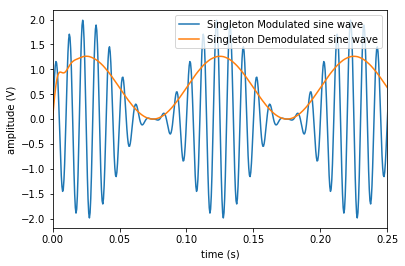

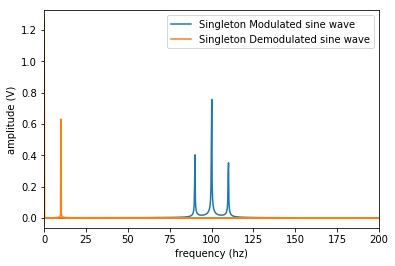

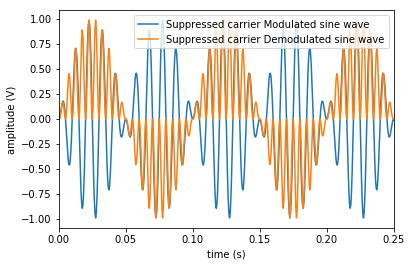

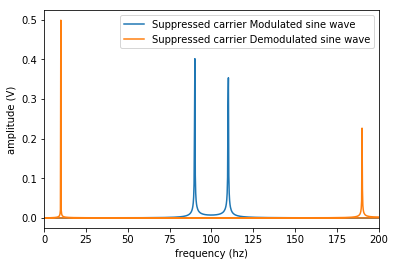

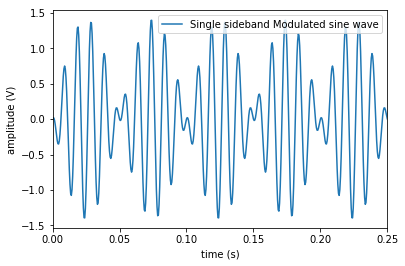

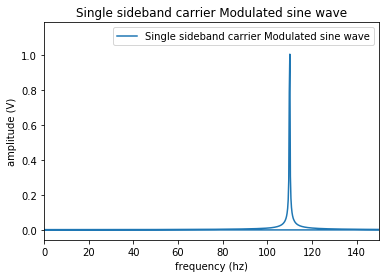


    6.Выводы:
        В ходе выполнения работы я ознакомился с амплитудной модуляцией и демодуляцией, их разновидностями.
        Для однотональной модуляции и модуляции с подавлением несущей были продемонстрированы частотные и временные характеристики закодированных и декодированных сигналов.
        Декодировать последний сигнал не удалось.

    


In [4]:
import sys
sys.path.append("../..") 
from __future__ import print_function
from Telecom.my_telecom import *
import numpy as np
from scipy.signal import butter, filtfilt, hilbert
import warnings
warnings.filterwarnings('ignore')


print(lab4_theory.__doc__)

# ----------------------------- Parameters of signal ------------------------------
sig_freq = 10  # frequency of original signal
T = 1.0 / sig_freq
sig_ampl = 1  # amplitude of original signal
fs = 2000  # sampling rate
ts = 1.0 / fs  # sampling interval
n = 1 << 13  # number of fft points, pick power of 2

t = np.arange(0, n * ts, step=ts)  # time vector

sig = sig_ampl * np.sin(2 * np.pi * sig_freq * t)

# ----------------------------- Parameters of modulation signal ------------------------------
carr_freq = sig_freq * 10
carr_ampl = sig_ampl

carr_sig = carr_ampl * np.sin(2 * np.pi * carr_freq * t)

# -------------------------------------------------------------------------------------------
m = sig_ampl / carr_ampl
singleton_mod = (1 + m * sig_ampl * sig) * carr_ampl * carr_sig
supp_carr_mod = sig_ampl * carr_ampl * sig * carr_sig
single_sideband_mod = hilbert(sig) * np.cos(2 * np.pi * carr_freq * t) - hilbert(sig) * carr_sig

order = 5
normal_cutoff = sig_freq / carr_freq

fnum, fdenom = butter(order, normal_cutoff)
singleton_demodulated = filtfilt(fnum, fdenom, abs(singleton_mod))
suppressed_carried_demod = supp_carr_mod * carr_ampl * carr_sig
# ----------------------------- Parameters of plotting ------------------------------
sig_xlim = (0, 0.25)

# ------------------------- spectrum calculating -----------------------------------------
fft_freq = np.fft.fftfreq(n, ts)  # python function to get Hz frequency axis

singleton_modulated_fft = \
    abs(np.fft.fft(singleton_mod)) / n * 2  # discrete Fourier Transform ( / n * 2 - normalization)
singleton_demodulated_fft = abs(np.fft.fft(singleton_demodulated)) / n * 2

suppressed_carried_mod_fft = abs(np.fft.fft(supp_carr_mod)) / n * 2
suppressed_carried_demod_fft = abs(np.fft.fft(suppressed_carried_demod)) / n * 2

single_sideband_mod_fft = abs(np.fft.fft(single_sideband_mod)) / n * 2

# ---------------------------- PLOTS -------------------------------------
# ------------------------------------------------------------------------
plot_graphic(t, singleton_mod,
             xlim=sig_xlim,
             x_label='time (s)', y_label='amplitude (V)', show=False)

plot_graphic(t, singleton_demodulated,
             xlim=sig_xlim,
             x_label='time (s)', y_label='amplitude (V)', show=False)

plt.legend(("Singleton Modulated sine wave", "Singleton Demodulated sine wave"), loc='upper right')
plt.show()
# ------------------------------------------------------------------------
plot_graphic(fft_freq, singleton_modulated_fft,
             xlim=[0, 200],
             x_label='frequency (hz)', y_label='amplitude (V)', show=False)

plot_graphic(fft_freq, singleton_demodulated_fft,
             xlim=[0, 200],
             x_label='frequency (hz)', y_label='amplitude (V)', show=False)

plt.legend(("Singleton Modulated sine wave", "Singleton Demodulated sine wave"), loc='upper right')
plt.show()
# ------------------------------------------------------------------------
plot_graphic(t, supp_carr_mod,
             xlim=sig_xlim,
             x_label='time (s)', y_label='amplitude (V)', show=False)

plot_graphic(t, suppressed_carried_demod,
             xlim=sig_xlim,
             x_label='time (s)', y_label='amplitude (V)', show=False)

plt.legend(("Suppressed carrier Modulated sine wave", "Suppressed carrier Demodulated sine wave"),
           loc='upper right')
plt.show()

# ------------------------------------------------------------------------
plot_graphic(fft_freq, suppressed_carried_mod_fft,
             xlim=[0, 200],
             x_label='frequency (hz)', y_label='amplitude (V)', show=False)

plot_graphic(fft_freq, suppressed_carried_demod_fft,
             xlim=[0, 200],
             x_label='frequency (hz)', y_label='amplitude (V)', show=False)

plt.legend(("Suppressed carrier Modulated sine wave", "Suppressed carrier Demodulated sine wave"),
           loc='upper right')
plt.show()

# ------------------------------------------------------------------------
plot_graphic(t, single_sideband_mod,
             xlim=sig_xlim,
             x_label='time (s)', y_label='amplitude (V)', show=False)

plt.legend(("Single sideband Modulated sine wave",), loc='upper right')
plt.show()

# ------------------------------------------------------------------------
plot_graphic(fft_freq, single_sideband_mod_fft,
             xlim=[0, 150],
             title='Single sideband carrier Modulated sine wave',
             x_label='frequency (hz)', y_label='amplitude (V)', show=False)

plt.legend(("Single sideband carrier Modulated sine wave",), loc='upper right')
plt.show()

print(lab4_conclusion.__doc__)